<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

**Import the required libraries**

In [26]:
# write your code here
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file

In [27]:
# write your code here
df = pd.read_csv('Ind_Climate_RainPred.csv')
df.head(2)

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No


In [28]:
df.shape

(10464, 12)


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# write your code here

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464 entries, 0 to 10463
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_min      10464 non-null  float64
 1   Temperature_max      10464 non-null  float64
 2   WindSpeedAt3am       10464 non-null  int64  
 3   WindSpeedAt10am      10464 non-null  int64  
 4   WindSpeedAt6pm       10464 non-null  int64  
 5   HumidityLevelAt10am  10464 non-null  int64  
 6   HumidityAt6pm        10464 non-null  int64  
 7   PressureAt10am       10464 non-null  float64
 8   PressureAt6pm        10464 non-null  float64
 9   TemperatureAt10am    10464 non-null  float64
 10  TemperatureAt6pm     10464 non-null  float64
 11  WillRainTomorrow?    10464 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 981.1+ KB


In [31]:
df.head(2)

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# write your code here

In [33]:
df.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# write your code here
df['WillRainTomorrow?'].value_counts(normalize = True)

No     0.522171
Yes    0.477829
Name: WillRainTomorrow?, dtype: float64

Yes Balanced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# write your code here
df.isnull().sum()

Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

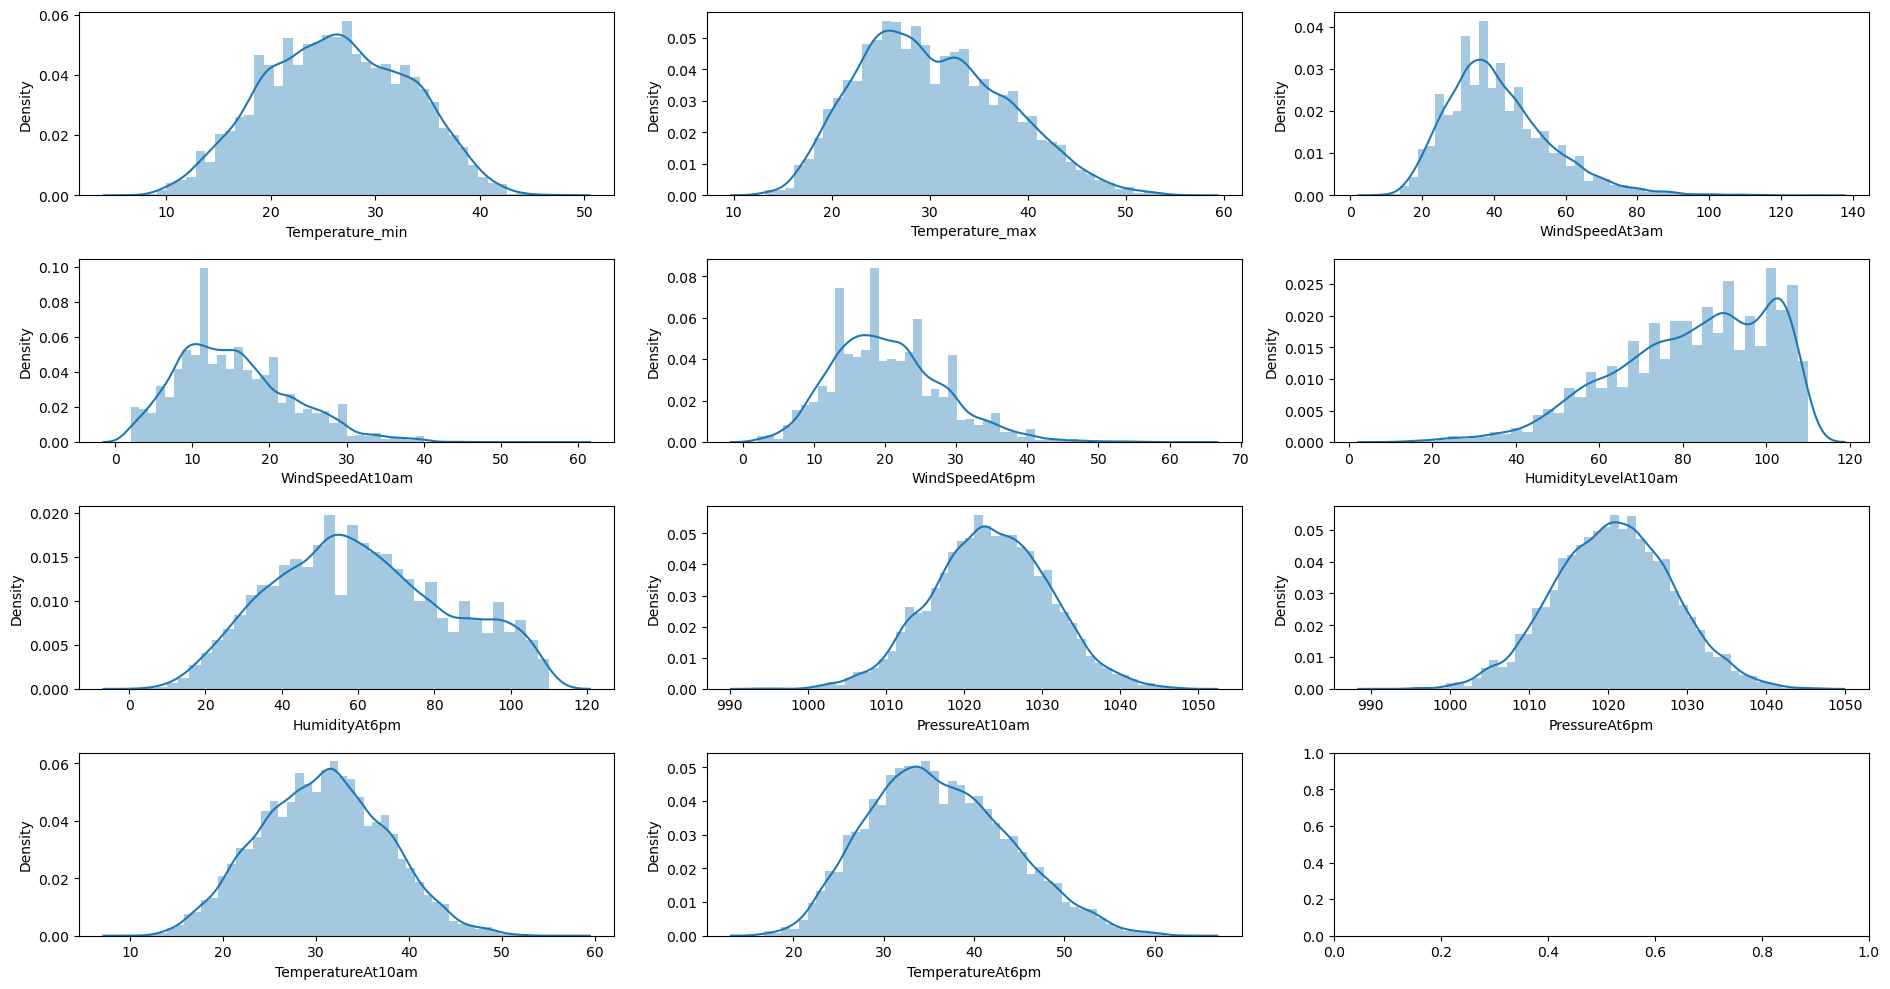

In [36]:
fig , ax = plt.subplots(4,3,figsize = (19,10))
for col,subplots in zip(df.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(df[col],ax=subplots,kde=True)
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# write your code here
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
x = df.drop('WillRainTomorrow?',1)
x_sc = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
x_sc.head(2)

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
0,-0.878155,0.052541,-0.650557,-1.259210,-0.432548,1.497518,0.484111,0.243831,-0.713365,-0.609118,0.541413
1,0.539411,0.402758,-0.581288,-0.722216,-0.050237,-0.658008,-1.143217,1.225781,1.977394,-0.609118,0.398983


<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# write your code here

In [40]:
c = np.cov(x_sc.T)
c

array([[ 1.00009557,  0.62986804,  0.2774717 ,  0.19188583,  0.10114221,
        -0.25035675, -0.05795163, -0.3635111 , -0.34036162,  0.71612149,
         0.54811355],
       [ 0.62986804,  1.00009557,  0.23626203, -0.01431146,  0.07161277,
        -0.50728072, -0.55772371, -0.24497184, -0.29854472,  0.76966307,
         0.8658169 ],
       [ 0.2774717 ,  0.23626203,  1.00009557,  0.42037333,  0.57176138,
        -0.27611053, -0.11724591, -0.47841125, -0.47563157,  0.27207988,
         0.17209019],
       [ 0.19188583, -0.01431146,  0.42037333,  1.00009557,  0.33458778,
        -0.31749763, -0.00663469, -0.25165481, -0.18433562,  0.14168084,
        -0.0391036 ],
       [ 0.10114221,  0.07161277,  0.57176138,  0.33458778,  1.00009557,
        -0.19684857, -0.15049059, -0.33940416, -0.30875067,  0.10542863,
         0.04909065],
       [-0.25035675, -0.50728072, -0.27611053, -0.31749763, -0.19684857,
         1.00009557,  0.66141695,  0.15161387,  0.15052404, -0.46424741,
        -0.465

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# write your code here

In [42]:
eigval, eigvect = np.linalg.eig(c)

In [43]:
eigval

array([4.37827342, 2.20537611, 1.4028951 , 0.93909121, 0.69185977,
       0.38762838, 0.34242384, 0.24329175, 0.11262274, 0.13748201,
       0.160107  ])

In [44]:
eigvect

array([[ 0.33781785,  0.03549082,  0.35858565, -0.42444298,  0.13644818,
         0.14320347, -0.03924682,  0.7102148 ,  0.1131725 , -0.11587593,
        -0.06766114],
       [ 0.40087506,  0.28485778,  0.10425574,  0.03376955,  0.1189962 ,
        -0.08118397,  0.15405941, -0.11028839, -0.82752819, -0.0604924 ,
         0.03216514],
       [ 0.26666777, -0.38120744, -0.1908883 , -0.02705605,  0.31592881,
        -0.78707893, -0.12571969,  0.05588588,  0.05942134,  0.04255307,
        -0.05314346],
       [ 0.14561644, -0.32320401, -0.33544556, -0.59156622, -0.38842204,
         0.06004674,  0.47855507, -0.14902074, -0.05799504, -0.04274979,
        -0.03114975],
       [ 0.17812567, -0.3671682 , -0.34917199,  0.09189247,  0.61597616,
         0.55598391, -0.01913024, -0.05338958, -0.03795733, -0.01323056,
         0.09857223],
       [-0.3093895 , -0.14948994,  0.44585592,  0.03061406,  0.38031984,
        -0.06731708,  0.58995926, -0.13531557,  0.03534899, -0.07698165,
        -0.399

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# write your code here

In [46]:
eigval

array([4.37827342, 2.20537611, 1.4028951 , 0.93909121, 0.69185977,
       0.38762838, 0.34242384, 0.24329175, 0.11262274, 0.13748201,
       0.160107  ])

In [47]:
eigval[eigval>1]

array([4.37827342, 2.20537611, 1.4028951 ])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# write your code here

In [49]:
from sklearn.decomposition import PCA

In [75]:
my_pca = PCA(n_components=0.80)
pca2 = my_pca.fit_transform(x_sc)
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1,2,3
0,-1.193577,-0.344281,-1.318532,1.383219
1,-0.417268,-2.300435,1.143463,-0.313206
2,-1.374390,-0.522208,-0.229444,-0.056650
3,-0.166105,1.620767,0.794714,0.358037
4,0.528825,-2.208708,-1.513146,0.370726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# write your code here

In [52]:
my_pca = PCA(n_components=4)
pca2 = my_pca.fit_transform(x_sc)
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1,2,3
0,-1.193577,-0.344281,-1.318532,1.383219
1,-0.417268,-2.300435,1.143463,-0.313206
2,-1.374390,-0.522208,-0.229444,-0.056650
3,-0.166105,1.620767,0.794714,0.358037
4,0.528825,-2.208708,-1.513146,0.370726


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# write your code here

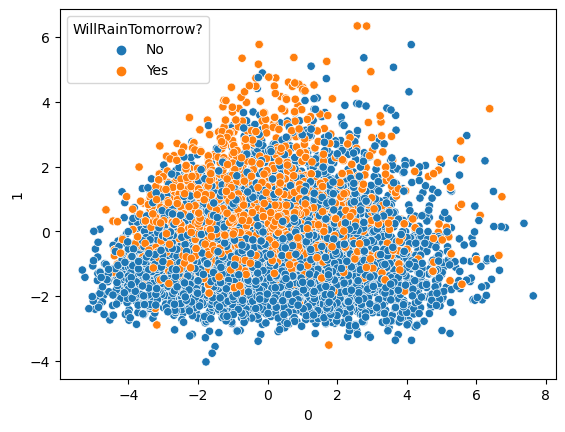

In [54]:
sns.scatterplot(data = pca_df, x = 0, y = 1, hue=df['WillRainTomorrow?'])
plt.show()

# taking 0 and 1 because we need only 2 values for 2d visualisation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# write your code here

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
y = df['WillRainTomorrow?']

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc, y, test_size=0.3, random_state=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# write your code here

In [60]:
from sklearn.decomposition import PCA

In [61]:
my_pca = PCA(n_components = 3, random_state = 2)
xtrain_pca = my_pca.fit_transform(xtrain)
xtest_pca = my_pca.fit_transform(xtest)

In [62]:
xtest_pca.shape

(3140, 3)

In [63]:
xtrain_pca.shape

(7324, 3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# write your code here

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [92]:
def randomforedt_model(xtrain,xtest,ytrain,ytest):
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(xtrain,ytrain)
    ypred = rf.predict(xtest)
    test_acc = accuracy_score(ytest, ypred)
    
    return test_acc

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
# write your code here

In [94]:
%%time
print(randomforedt_model(xtrain, xtest, ytrain, ytest))

0.9372611464968152
CPU times: total: 1 s
Wall time: 1.03 s


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# write your code here

In [70]:
%%time
print(randomforedt_model(xtrain_pca, xtest_pca, ytrain, ytest))

0.8047770700636943
CPU times: total: 859 ms
Wall time: 959 ms
